In [15]:
#LA FUNCIÓN DE ESTE BLOQUE ES CARGAR Y EXPLORAR EL DATASET

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url)

print("Vista del Dataset")
print(df.head())

print("Informacion general del Dataset")
print(df.info())


Vista del Dataset
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Informacion general del Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [22]:
#LA FUNCIÓN DE ESTE BLOQUE ES VERIFICAR SI HAY VALORES NULOS EN EL DATASET
print("Conteo de valores nulos por columna")
print(df.isnull().sum())

Conteo de valores nulos por columna
Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


In [24]:
#LA FUNCIÓN DE ESTE BLOQUE ES DIVIDIR EL DATASET EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA
#Y MOSTRAR LAS DIMENSIONES DE CADA CONJUNTO

#Division del conjunto de datos
x = df.drop(['sales', 'Unnamed: 0'], axis=1)
y = df['sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Datos de entrenamiento: {x_train.shape}, Datos de prueba: {x_test.shape}")



Datos de entrenamiento: (160, 3), Datos de prueba: (40, 3)


In [25]:
#LA FUNCIÓN DE ESTE BLOQUE ES ESCALAR LAS CARACTERÍSTICAS DEL DATASET PARA MEJORAR EL RENDIMIENTO DEL MODELO
#Y ASEGURAR QUE TODAS LAS CARACTERÍSTICAS TENGAN LA MISMA ESCALA

#Escalamiento de las características
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
#Creacion y entrenamiento del modelo
model = LinearRegression()
model.fit(x_train_scaled, y_train)

#Prediccion de datos
y_pred = model.predict(x_test_scaled)

print("Primeras predicciones")
print(y_pred[:10])  

Primeras predicciones
[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967]


In [27]:
#LA FUNCIÓN DE ESTE BLOQUE ES EVALUAR EL RENDIMIENTO DEL MODELO UTILIZANDO
#DIFERENTES MÉTRICAS

#Evaluacion del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))

print(f"\nEvaluación del modelo:")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raiz de error cuadratico medio (RMSE): {rmse}")
print(f"Coeficiente de determinación (R²): {r2}")
print(f"Error absoluto medio (MAE): {mae}")


Evaluación del modelo:
Error cuadrático medio (MSE): 3.1740973539761073
Raiz de error cuadratico medio (RMSE): 1.781599661533451
Coeficiente de determinación (R²): 0.8994380241009119
Error absoluto medio (MAE): 1.4607567168117601


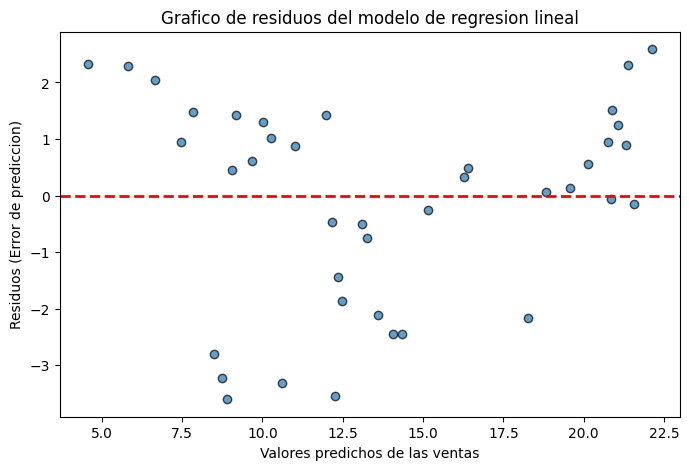

In [28]:
import matplotlib.pyplot as plt

residuos = y_test - y_pred
plt.figure(figsize=(8,5)) 
plt.scatter(y_pred, residuos, alpha = 0.7, edgecolors ='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Grafico de residuos del modelo de regresion lineal")
plt.xlabel("Valores predichos de las ventas")
plt.ylabel("Residuos (Error de prediccion)")
plt.show()